In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/praktikum_ml/praktikum03/"

In [3]:
import pandas as pd

df = pd.read_csv(path + "data/socr.csv", sep=",")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


konversi  data menjadi satuan cm dan kg

In [5]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
      .rename(columns={"Height(Inches)": "tinggi_cm", "Weight(Pounds)": "berat_kg"})
      .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54, #in -> cm
        berat_kg=lambda d: d["berat_kg"] * 0.45359237
        ) #lb -> kg
      .round({"tinggi_cm": 2, "berat_kg":2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [6]:
from sklearn.model_selection import train_test_split

x = df1[["tinggi_cm"]]
y = df1["berat_kg"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=7
)
x_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


Pemodelan Data dengan data training

In [7]:
from sklearn.linear_model import LinearRegression

#buat object model instan dari class LinearRegression
model = LinearRegression()

#lakukan proses training
model.fit(x_train,y_train)

LinearRegression()

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#prediksi model dengan data testing
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()
df_resume['R2']= r2
df_resume['Koefisien (kg/cm)'] = model.coef_
df_resume['Intersep (kg)']= model.intercept_
df_resume['MAE (kg)'] = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
df_resume['MSE (kg)'] = mse
df_resume['RMSE (kg)'] = rmse
df_resume

,R2,Koefisien (kg/cm),Intersep (kg),MAE (kg),MSE (kg),RMSE (kg)
0,NaN,0.551823,-37.657089,3.670411,21.242938,4.609006


In [9]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan : y = {slope:.3f}*x + {intercept:.3f}")

Persamaan : y = 0.552*x + -37.657


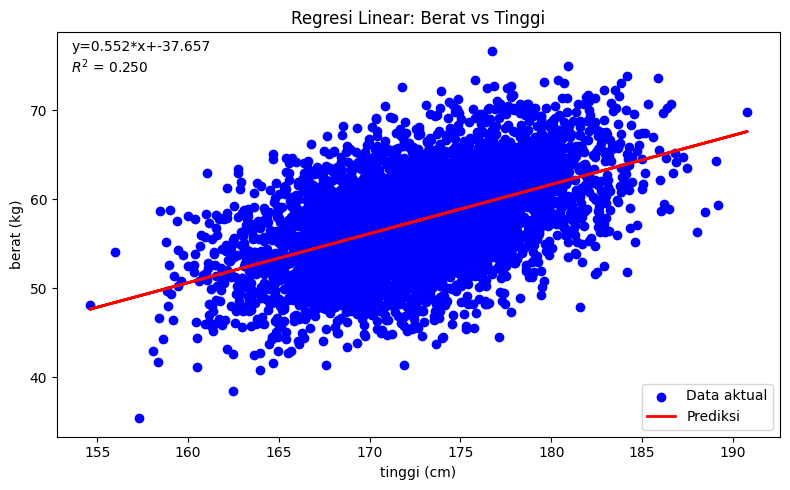

In [10]:
import matplotlib.pyplot as plt

#plot data scotter
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color="blue", label="Data aktual")
plt.plot(x_test, y_pred,color="red", linewidth=2, label="Prediksi")
plt.xlabel("tinggi (cm)")
plt.ylabel("berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y={slope:.3f}*x+{intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,va="top"
)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
y_pred = model.predict(x_test)

hasil = pd.DataFrame({
    ""
})

In [12]:
import pandas as pd
df2 = pd.read_csv(path + "data/berat_ai2025.csv", sep=";")

y_pred = model.predict(df2[['tinggi_cm']])
df2['prediksi_kg'] = y_pred
df2['selisih error (kg)'] = df2['prediksi_kg'] - df2['actual_berat_kg']
demon = df2['actual_berat_kg'].replace(0, np.nan)
df2["akurasi (%)"] = (1 - (df2["selisih error (kg)"].abs() / demon)).clip(lower=0, upper=1) * 100
df2.head()

,no,nama,tinggi_cm,actual_berat_kg,prediksi_kg,selisih error (kg),akurasi (%)
0,1,rava,168,58.5,55.049219,-3.450781,94.101229
1,2,tiara,162,78.3,51.738280,-26.561720,66.076985
2,3,tia,155,52.7,47.875517,-4.824483,90.845383
3,4,keyla,160,70.3,50.634633,-19.665367,72.026505
4,5,bania,183,65.8,63.326568,-2.473432,96.240985


In [13]:
df2.describe()

,no,tinggi_cm,actual_berat_kg,prediksi_kg,selisih error (kg),akurasi (%)
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,165.600000,65.120000,53.724843,-11.395157,83.858218
std,1.581139,10.784248,9.988593,5.950999,11.003466,13.813348
min,1.000000,155.000000,52.700000,47.875517,-26.561720,66.076985
25%,2.000000,160.000000,58.500000,50.634633,-19.665367,72.026505
50%,3.000000,162.000000,65.800000,51.738280,-4.824483,90.845383
75%,4.000000,168.000000,70.300000,55.049219,-3.450781,94.101229
max,5.000000,183.000000,78.300000,63.326568,-2.473432,96.240985


In [14]:
import pandas as pd
df3 = pd.read_csv(path + "data/stunting_wasting_dataset.csv", sep=",")

df3.head()


,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [15]:
df3.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [23]:
df4 = (df3[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]].rename(
    columns={
        "Berat Badan (kg)": "berat_kg",
        "Jenis Kelamin": "jk",
        "Umur (bulan)": "umur_bln",
        "Tinggi Badan (cm)": "tinggi_cm"
    }).copy())
df4["jk"] = df4["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df4.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [25]:
corr_matrix = df4.corr()
print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


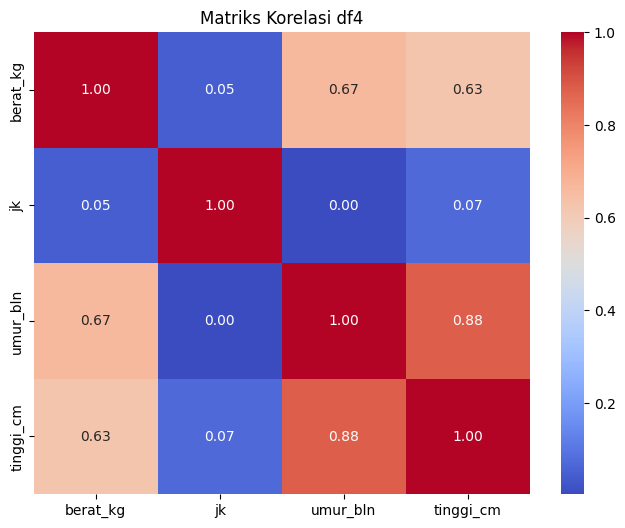

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df4")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

y = df4["berat_kg"]

x = df4[["umur_bln", "tinggi_cm"]]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Jumlah data train :", len(x_train))
print("Jumlah data test  :", len(x_test))
x_train.head()

Jumlah data train : 80000
Jumlah data test  : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [47]:
x_train_const = sm.add_constant(x_train)
x_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5


In [48]:
import statsmodels.api as sm
#Buat model OLS
model = sm.OLS(y_train, x_train_const).fit()
print('-------')
print(model.params)
print('-------')
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']
#print persamaan regresi
print(f"y = {const:.3f} + {x1_umur:.3f}*x1 + {x2_tinggi:.3f}*x2")

-------
const        2.545617
umur_bln     0.229719
tinggi_cm    0.054192
dtype: float64
-------
y = 2.546 + 0.230*x1 + 0.054*x2


In [52]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                 3.272e+04
Date:                Sun, 12 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:49:57   Log-Likelihood:            -1.8505e+05
No. Observations:               80000   AIC:                         3.701e+05
Df Residuals:                   79997   BIC:                         3.701e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5456      0.091     28.039      0.0

In [54]:
# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(x_test)
# Prediksi berat badan
y_pred_test = model.predict(X_test_const)
# Buat tabel hasil prediksi
hasil = pd.DataFrame({
"Umur (bulan)": x_test["umur_bln"].to_numpy(),
"Tinggi (cm)": x_test["tinggi_cm"].to_numpy(),
"Berat Aktual (kg)": y_test.to_numpy(),
"Berat Prediksi (kg)": y_pred_test
})
#1) Selisih error (positif = overpredict)
hasil ["Selisih error (kg)"] = hasil ["Berat Prediksi (kg)"] = hasil ["Berat Aktual (kg)"]
#2) Akurasi per-baris (100 * (1 - /error//aktual)), dibatasi 0-100
denom = hasil ["Berat Aktual (kg)"].replace(0, np.nan) #antisipasi pembagi nol
hasil ["Akurasi (%)"] = (1 - (hasil ["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100
hasil

,Umur (bulan),Tinggi (cm),Berat Aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
75721,1,54.6,7.0,7.0,7.0,0.0
80184,8,66.0,12.2,12.2,12.2,0.0
19864,20,90.0,10.9,10.9,10.9,0.0
76699,13,82.4,9.6,9.6,9.6,0.0
92991,11,70.1,13.2,13.2,13.2,0.0
...,...,...,...,...,...,...
32595,9,67.3,11.8,11.8,11.8,0.0
29313,15,80.2,9.6,9.6,9.6,0.0
37862,8,61.9,8.0,8.0,8.0,0.0
53421,12,74.9,5.4,5.4,5.4,0.0
